#Data Science Lifecycle

In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Import necessary python modules (libraries)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')
df = pd.concat([train_df, test_df], ignore_index=True)
#check if combined from nb of entries
print(df.info())
#print head
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0 

# 3. Exploratory Data Analysis


In [ ]:
getting the number of rows and the number of columns that we have in our dataset
df.shape

(614, 13)

##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [ ]:

print(df['Credit_History'].unique())

[ 1.  0. nan]


Do the same with the variable Loan_Amount_Term

In [ ]:

print(df['Loan_Amount_Term'].unique())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:

#Property_Area
print(df['Property_Area'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [ ]:

#Dependents
print(df['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Create a new dataframe removeNA_df, where we remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:

removeNA_df=df.dropna()
removeNA_df.shape


[1. 0.]


Plot the distribution and the boxplot for the variable 'LoanAmount'

Skewness: 2.3614368477871213


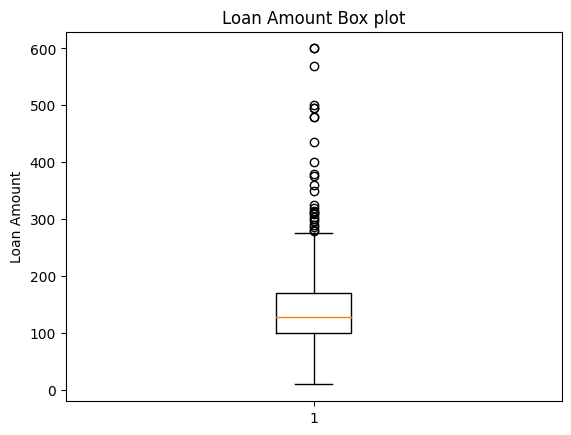

In [ ]:

plt.boxplot(removeNA_df['LoanAmount'])
plt.ylabel('Loan Amount')
plt.title('Loan Amount Box plot')


Do the same for the variable 'ApplicantIncome'

Text(0.5, 1.0, 'Applicant Income Box plot')

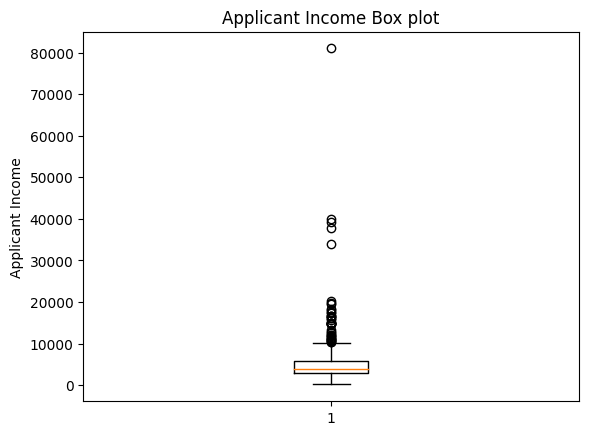

In [ ]:

plt.boxplot(removeNA_df['ApplicantIncome'])
plt.ylabel('Applicant Income')
plt.title('Applicant Income Box plot')

Do the same for 'CoapplicantIncome'

Text(0.5, 1.0, 'Coapplicant Income Box plot')

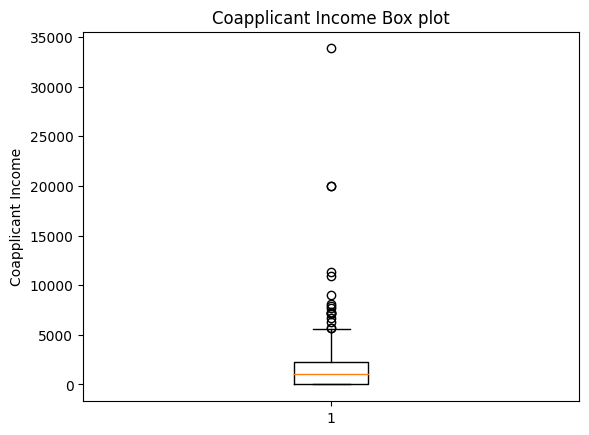

In [ ]:

plt.boxplot(removeNA_df['CoapplicantIncome'])
plt.ylabel('Coapplicant Income')
plt.title('Coapplicant Income Box plot')

Text(0.5, 1.0, 'Loan Amount Term Box plot')

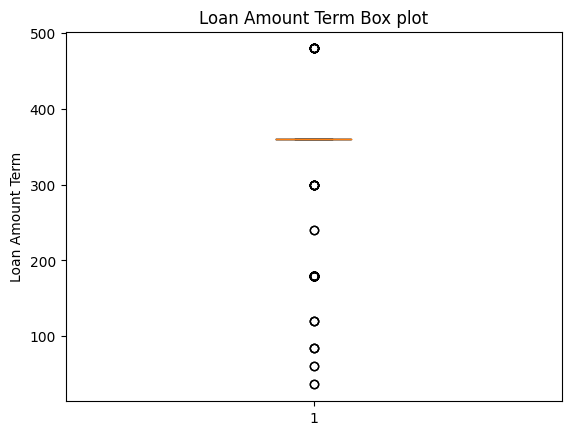

In [ ]:

plt.boxplot(removeNA_df['Loan_Amount_Term'])
plt.ylabel('Loan Amount Term')
plt.title('Loan Amount Term Box plot')

Plot the value_counts for 'Loan_Amount_term'

Text(0.5, 1.0, 'Histogram of Loan Amount Term')

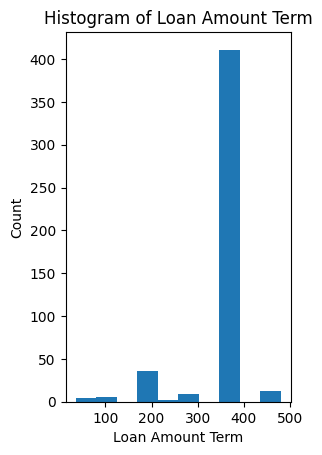

In [ ]:

plt.subplot(1, 2, 2)
plt.hist(removeNA_df['Loan_Amount_Term'],10)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Histogram of Loan Amount Term')

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

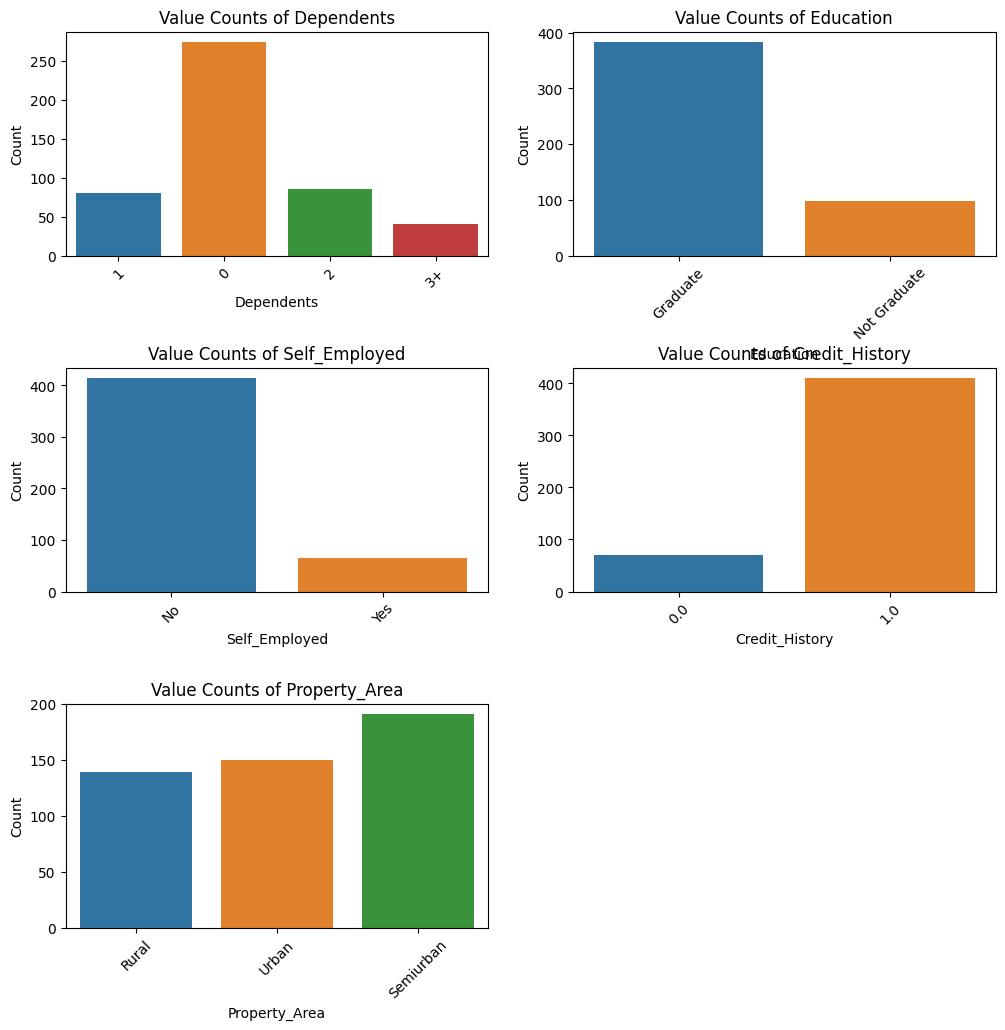

In [ ]:

plt.figure(figsize=(12, 16))

categorical_vars = ['Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=removeNA_df, x=var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Value Counts of {var}')
    plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)



Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

Loan_Status    N    Y  All
Gender                    
Female        32   54   86
Male         116  278  394
All          148  332  480


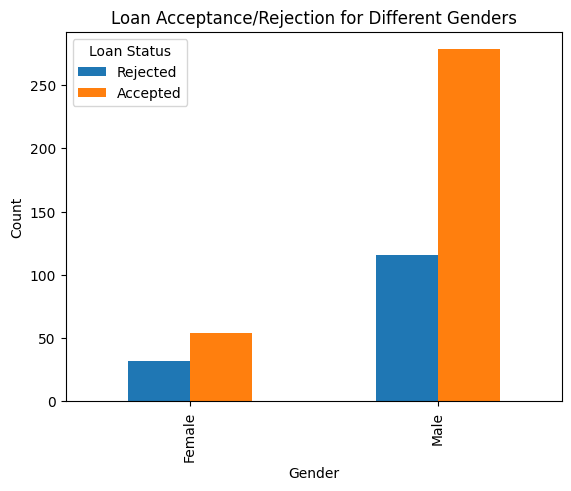

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Gender'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)

crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Different Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])



Does the Gender affect the acceptance of the Loan?

**The probability of a female to be accepted is  lower than the male**

**P(FEMALE & Yes)= 54/86=0.63**

**P(Male & yes)=332/480=0.7**

Do the same with Credit_history and Loan_Status

Loan_Status       N    Y  All
Credit_History               
0.0              63    7   70
1.0              85  325  410
All             148  332  480


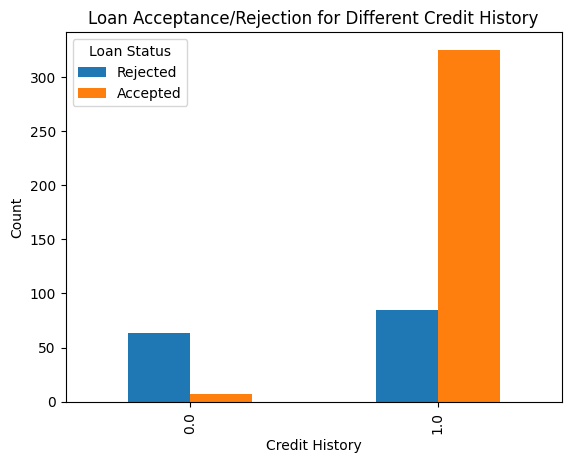

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Credit_History'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)
# Plotting bars for each credit history
crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Different Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])




Do the same with Dependents and Loan_Status

Loan_Status    N    Y  All
Dependents                
0             87  187  274
1             28   52   80
2             20   65   85
3+            13   28   41
All          148  332  480


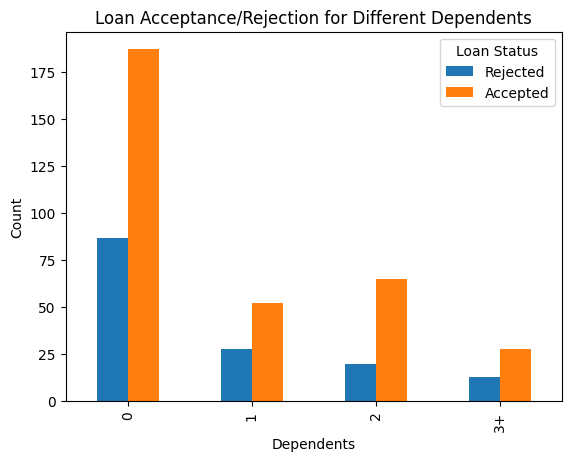

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Dependents'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)

crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Different Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])




Do the same between Education and Loan_Status

Loan_Status     N    Y  All
Education                  
Graduate      112  271  383
Not Graduate   36   61   97
All           148  332  480


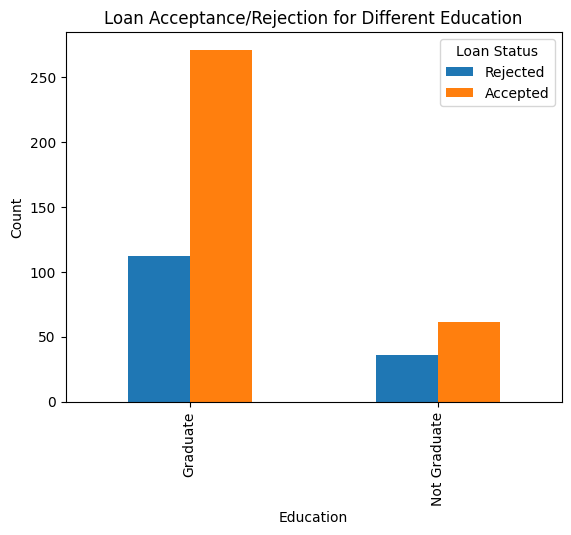

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Education'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)


crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Different Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])


**As we can conclude for the bars , Graduate people have more chance to be accepted**

Do the same between Married and Loan_Status

Loan_Status    N    Y  All
Married                   
No            64  105  169
Yes           84  227  311
All          148  332  480


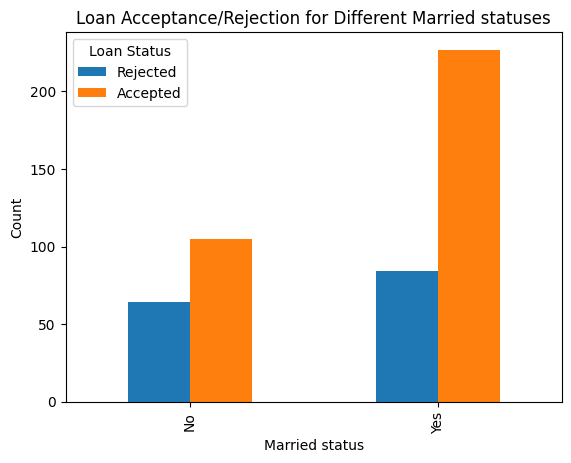

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Married'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)

crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Different Married statuses')
plt.xlabel('Married status')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])



** Married people have higher change to get accepted**

Do the same between Property_Area and Loan_Status

Loan_Status      N    Y  All
Property_Area               
Rural           54   85  139
Semiurban       42  149  191
Urban           52   98  150
All            148  332  480


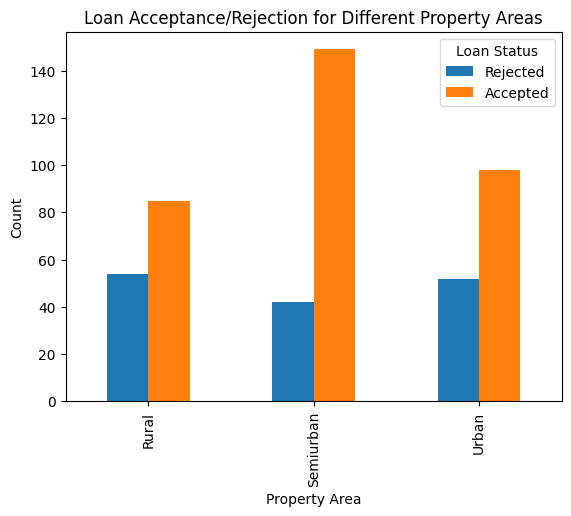

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Property_Area'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)

crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Different Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])



**SemiUrban has a higher proba to get accepted**

Do the same between Self_Employed and Loan_Status

Loan_Status      N    Y  All
Self_Employed               
No             125  289  414
Yes             23   43   66
All            148  332  480


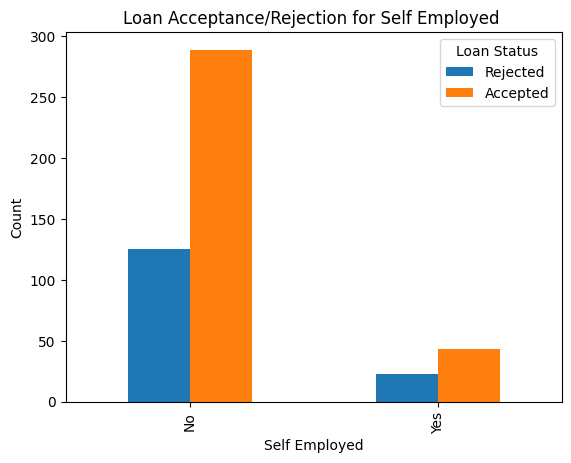

In [ ]:

crosstab_result = pd.crosstab(removeNA_df['Self_Employed'], removeNA_df['Loan_Status'],margins=True)
print(crosstab_result)

crosstab_result = crosstab_result.drop(index='All', columns='All')
crosstab_result.plot(kind='bar')

# Setting labels and title
plt.title('Loan Acceptance/Rejection for Self Employed ')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])



**Non employed people have better chance to get accepted **

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

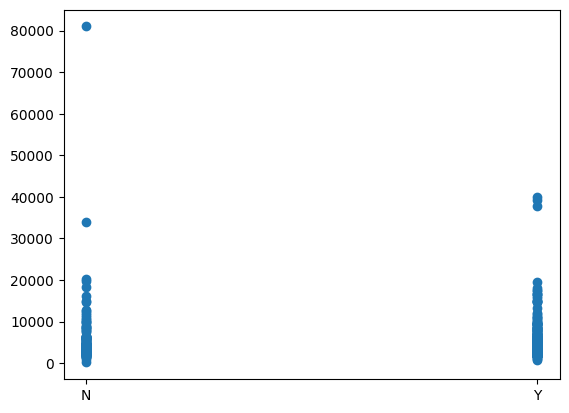

In [ ]:

plt.scatter(removeNA_df['Loan_Status'],removeNA_df['ApplicantIncome'])

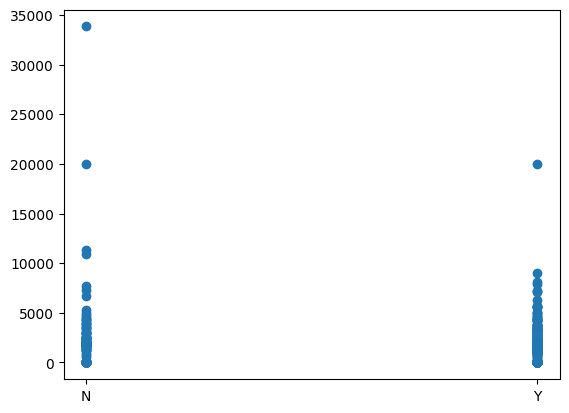

In [ ]:

plt.scatter(removeNA_df['Loan_Status'],removeNA_df['CoapplicantIncome'])


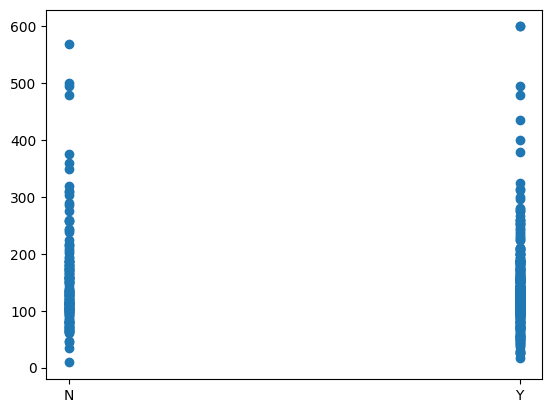

In [ ]:

plt.scatter(removeNA_df['Loan_Status'],removeNA_df['LoanAmount'])


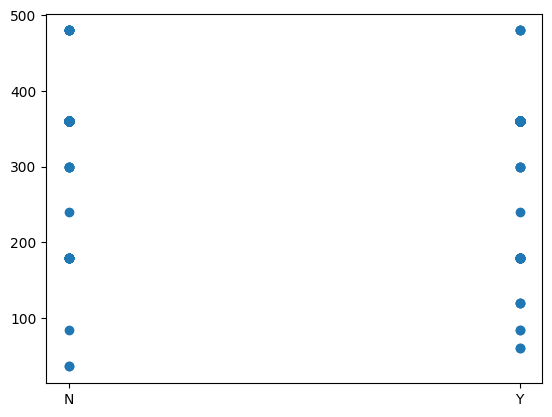

In [ ]:

plt.scatter(removeNA_df['Loan_Status'],removeNA_df['Loan_Amount_Term'])


** i think these 4 features dont give valuable info about loan status**

Group your dataframe by Loan_Status on the median Value

In [ ]:

group=removeNA_df.groupby('Loan_Status').median()
print(group)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3871.0                0.0       128.0             360.0   
Y                     3858.5             1211.5       128.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


<ipython-input-56-ecd849862ba1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group=removeNA_df.groupby('Loan_Status').median()


**i can deduce that only the CoApplicantIncome is valuable for the model**

# 4. Preprocessing

Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:

columns_to_remove = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Drop the specified columns
df.drop(columns=columns_to_remove, axis=1, inplace=True)

## Remove grabage data

If we go back to one of the EDA steps where we saw the unique values of Dependents, we can see that we have '3+' as a value. In order to make the algorithm learn from such information, we have to replace this with a number. We will replace it by 3.

In [ ]:

df['Dependents']=df['Dependents'].replace('3+','3')
print(df['Dependents'].unique())


['0' '1' '2' '3' nan]


##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:

for col in df.describe(include='O').columns:
  df[col]=df[col].astype('category')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing continuous data with mean
continuous_columns = ['CoapplicantIncome', 'Credit_History']
for column in continuous_columns:
    df[column].fillna(df[column].mean(), inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    category
 1   Married            614 non-null    category
 2   Dependents         614 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      614 non-null    category
 5   CoapplicantIncome  614 non-null    float64 
 6   Credit_History     614 non-null    float64 
 7   Property_Area      614 non-null    category
 8   Loan_Status        614 non-null    category
dtypes: category(7), float64(2)
memory usage: 14.8 KB


## Check if any null value exist

In [ ]:

print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Encode categorical data

Go over our categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:

#encode gender
gender = {'Male':0, 'Female':1}
#df['Gender'] = df['Gender'].apply(lambda x: gender[x])
#encode Education
educationlvl={'Graduate':1,'Not Graduate':0}
#df['Education']=df['Education'].apply(lambda x:educationlvl[x])
#self employed
YesNo={'Yes':1,'No':0}
#df['Self_Employed']=df['Self_Employed'].apply(lambda x:YesNo[x])
#property area
prop_area={'Urban':1,'Semiurban':2,'Rural':3}
#df['Property_Area']=df['Property_Area'].apply(lambda x:prop_area[x])
#loan_status
loan_sts={'Y':1,'N':0}
#df['Loan_Status']=df['Loan_Status'].apply(lambda x:loan_sts[x])
#df['Married']=df['Married'].apply(lambda x :YesNo[x])
# print head to verify
df.head(20)


,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.0,1.000000,1,1
1,0,1,1,1,0,1508.0,1.000000,3,0
2,0,1,0,1,1,0.0,1.000000,1,1
3,0,1,0,0,0,2358.0,1.000000,1,1
4,0,0,0,1,0,0.0,1.000000,1,1
5,0,1,2,1,1,4196.0,1.000000,1,1
6,0,1,0,0,0,1516.0,1.000000,1,1
7,0,1,3,1,0,2504.0,0.000000,2,0
8,0,1,2,1,0,1526.0,1.000000,1,1
9,0,1,1,1,0,10968.0,1.000000,2,0


## Normalization

Normalize data ranges for all features
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:

for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast='integer', errors='coerce')

data_max = df.max()
df = df.divide(data_max)
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.248100,0.781759,0.133550,0.038910,0.842199,0.654180,0.687296
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.070229,0.349681,0.262494,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.333333,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.028524,1.000000,0.666667,1.000000
75%,0.000000,1.000000,0.333333,1.000000,0.000000,0.055134,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:

# store all columns except last one as inputs in X
X = df.iloc[:,0:-1].values
# store the last column as the output (label) in Y
Y = df.iloc[:,-1].values

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=25)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(429, 8) (429,)
(185, 8) (185,)


##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:

model = LogisticRegression()
# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

Text(0, 0.5, 'Feature')

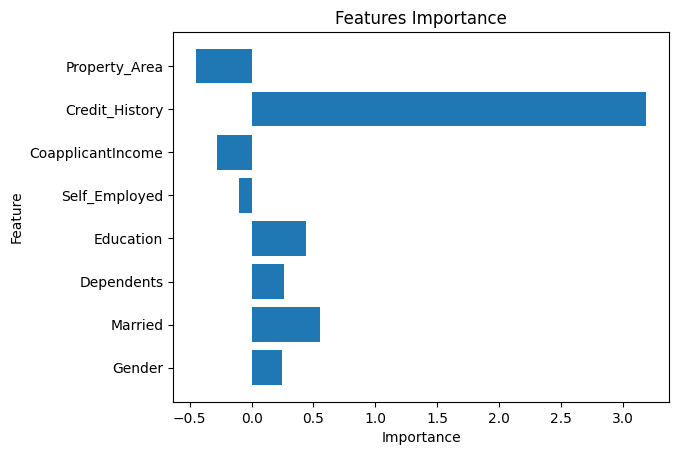

In [ ]:
columns_names = df.columns[0:-1].values
features_importance = model.coef_[0]  # Flatten the 2D array

plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')



What's the most important feature?

**Credit History**